### Import Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [77]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [78]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [79]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 100000

Number of features: 9

Features:
['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']

Missing values: 0

Unique values:
CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64


In [80]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [81]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [83]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [84]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [85]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

### 1. Data Preprocessing:

In [86]:
#drop unnecessary columns. CustomerId and Name will be droped since they are id of customers.
df.drop(columns = ['CustomerID','Name'], inplace = True)

In [87]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


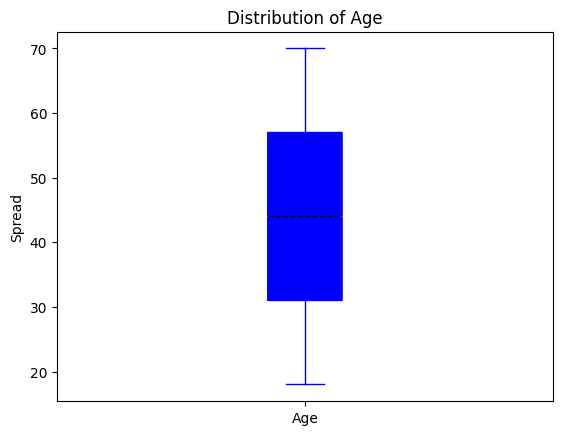

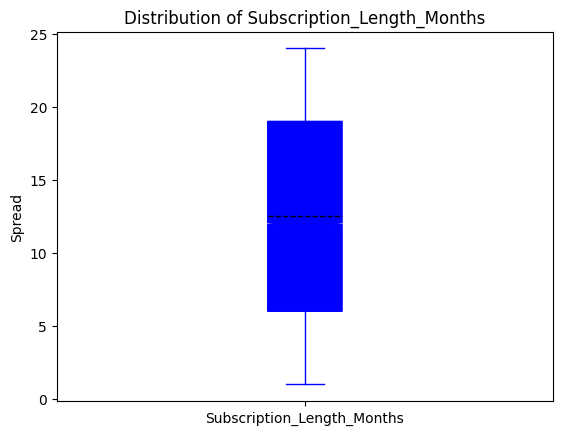

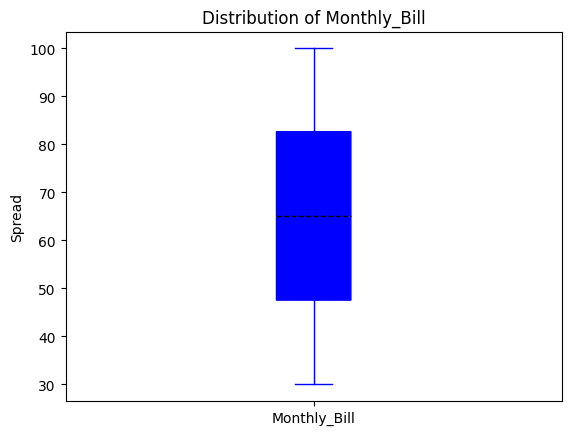

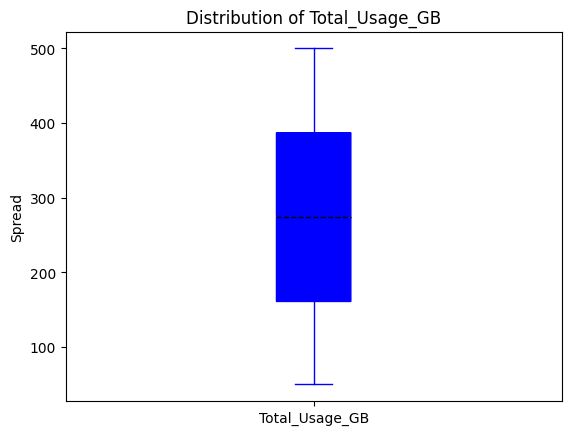

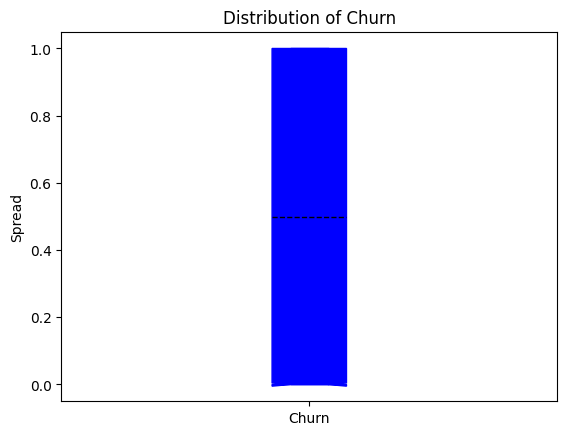

In [88]:
# Create Boxplot to find outliers in data
num_features = [i for i in df.columns if df[i].dtypes != 'object']
for i in df[num_features]:
    df[i].plot(kind='box',meanline=True,patch_artist=True,showmeans=True,notch=True,meanprops=dict(color='black'),color='blue')
    plt.title(f"Distribution of {i}")
    plt.ylabel('Spread')
    plt.show()

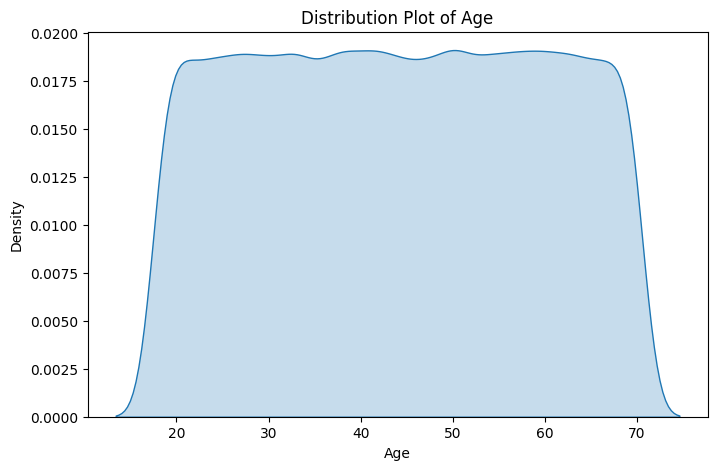

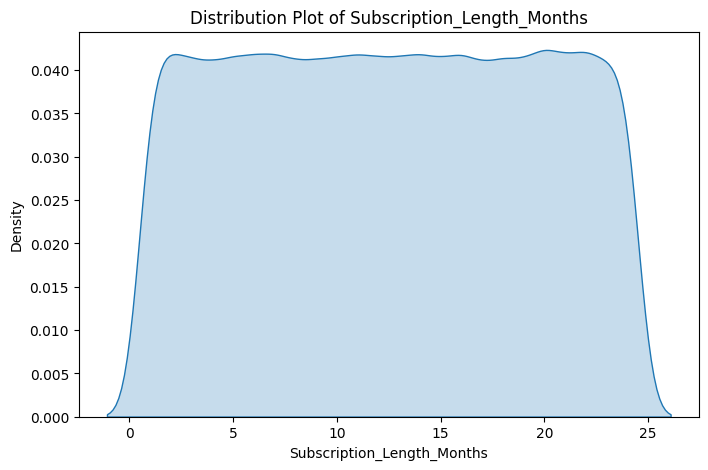

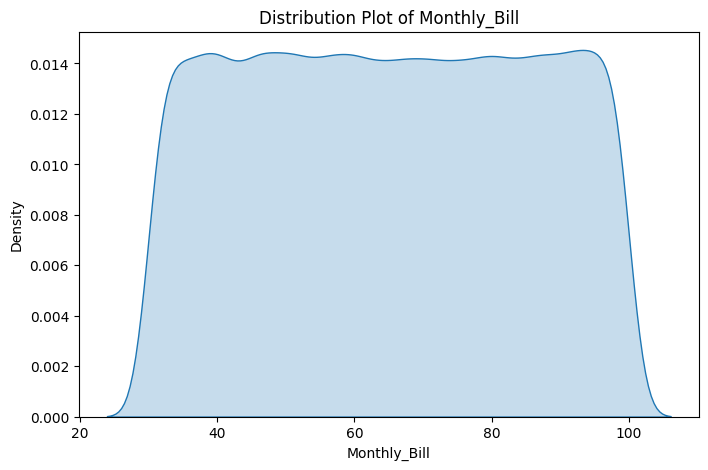

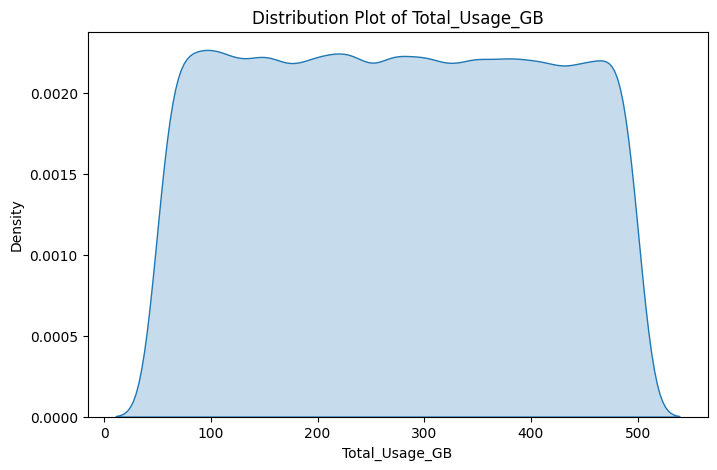

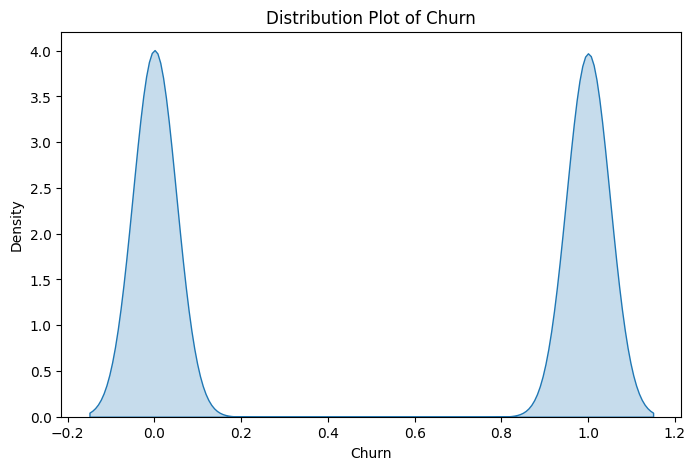

In [89]:
# Create distribution plots
for i in num_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=i, fill=True)
    plt.title(f"Distribution Plot of {i}")
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()

In [90]:
# Apply Label Encoding to 'Gender' and 'Location' column
#df['Gender'] = label_encoder.fit_transform(df['Gender'])

#df['Location'] = label_encoder.fit_transform(df['Location'])


### 2. Feature Engineering:

In [91]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [92]:
# Select only 4 important feature and remove 'Gender' and 'Location'
df.drop(columns=['Gender','Location'],axis=1,inplace=True)

In [93]:
x = df.drop(columns=['Churn'],axis=1)
y = df['Churn']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=3)

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Model Building:

In [96]:
# Build the Random Forest model using only important features
model_selected =  RandomForestClassifier()
model_selected.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
# Model Evaluation using selected features
y_pred_selected = model_selected.predict(X_test)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_rep_selected = classification_report(y_test, y_pred_selected)

In [98]:
print(f"Accuracy using selected features (optimized model): {accuracy_selected}")
print("Classification Report using selected features (optimized model):\n", classification_rep_selected)

Accuracy using selected features (optimized model): 0.50504
Classification Report using selected features (optimized model):
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     12555
           1       0.50      0.48      0.49     12445

    accuracy                           0.51     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.51      0.50     25000



### 4. Model Optimization:

In [99]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

In [100]:
grid_search = GridSearchCV(model_selected, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [101]:
best_model = grid_search.best_estimator_

In [102]:
# Model Evaluation using selected features
y_pred_selected = best_model.predict(X_test)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_rep_selected = classification_report(y_test, y_pred_selected)

In [103]:
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Accuracy using selected features (optimized model): {accuracy_selected}")
print("Classification Report using selected features (optimized model):\n", classification_rep_selected)

Best Model Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy using selected features (optimized model): 0.50228
Classification Report using selected features (optimized model):
               precision    recall  f1-score   support

           0       0.50      0.57      0.54     12555
           1       0.50      0.43      0.46     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



### 5. Model Deployment:

In [104]:
def predict_churn_optimized(new_customer_data):
    new_customer_scaled = scaler.transform(new_customer_data)
    churn_prediction = best_model.predict(new_customer_scaled)
    return churn_prediction

In [105]:
# Enter Data for Prediction
new_customer_data = pd.DataFrame({
    'Age': [30],
    'Subscription_Length_Months': [12],
    'Monthly_Bill': [60],
    'Total_Usage_GB': [200],
})

churn_prediction_optimized = predict_churn_optimized(new_customer_data)
print("Churn Prediction (optimized model):", churn_prediction_optimized)

Churn Prediction (optimized model): [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
